# **New york Recommendation System**

##### **Group 1 (i.e. Foodies) members**:
<ul type='square'> 
    <li> David Mwiti</li>
    <li> Karen Amanya</li>
    <li> Mercy Onduso </li>
    <li> Nicholus Magak </li>
    <li> Penina Wanyama </li>
    <li> Stephen Thuo </li>
</ul>

# Business Understanding

#### **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')
from dataprep.clean import clean_country #pip install dataprep
import pycountry #conda install -c conda-forge pycountry
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

#### **Loading the data**

##### _**1. restaurants_df**_

In [2]:
restaurant_df = pd.read_csv('restaurant_data.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False)
restaurant_df.head()

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,"T, h, a, i",jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,"S, z, e, c, h, u, a, n",8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,"S, h, a, n, g, h, a, i, n, e, s, e",0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,"C, o, c, k, t, a, i, l, , B, a, r, s",4DInnPhOyvXFbYpUdO0SMQ,325


##### _**2. users_df**_

In [3]:
user_revs_df = pd.read_csv('final_revs.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False, header=None)
columns=['User_Name','Account','Location','Date_of_review','Rating','Comment','Restaurant_link']
user_revs_df.columns = columns
user_revs_df.head()

,User_Name,Account,Location,Date_of_review,Rating,Comment,Restaurant_link
0,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
1,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
2,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
3,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...
4,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...


# Data Understanding

##### _**1. restaurants_df**_

In [4]:
restaurant_df.info()

# Observations:
#   16 columns & 500 rows
#   It has some missing phone & display phone numbers
#   Missing quite a bit of data on the pricing section

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               500 non-null    object 
 1   Rating             500 non-null    int64  
 2   Pricing            315 non-null    object 
 3   URL                500 non-null    object 
 4   Latitude           500 non-null    float64
 5   Longitude          500 non-null    float64
 6   Transactions       500 non-null    object 
 7   Location           500 non-null    object 
 8   Phone              430 non-null    float64
 9   Display Phone      430 non-null    object 
 10  Distance           500 non-null    float64
 11  Reviews            500 non-null    object 
 12  Review Count       500 non-null    int64  
 13  Cuisine            500 non-null    object 
 14  Restaurant ID      500 non-null    object 
 15  Number of Reviews  500 non-null    int64  
dtypes: float64(4), int64(3), o

In [5]:
# Converting the cuisine text to a more human readable format
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].map(lambda x: x.replace(',',''))

In [6]:
# viewing the types of cuisines 
set(restaurant_df['Cuisine'])

{'A m e r i c a n   ( N e w )',
 'A m e r i c a n   ( T r a d i t i o n a l )',
 'A r g e n t i n e',
 'A s i a n   F u s i o n',
 'A u s t r a l i a n',
 'A u s t r i a n',
 'B a g e l s',
 'B a k e r i e s',
 'B a r b e q u e',
 'B a r s',
 'B e l g i a n',
 'B r a z i l i a n',
 'B r e a k f a s t   &   B r u n c h',
 'B u b b l e   T e a',
 'B u f f e t s',
 'B u r g e r s',
 'B u r m e s e',
 'C a f e s',
 'C a j u n / C r e o l e',
 'C a m b o d i a n',
 'C a n t o n e s e',
 'C a r i b b e a n',
 'C h i c k e n   S h o p',
 'C h i c k e n   W i n g s',
 'C h i n e s e',
 'C o c k t a i l   B a r s',
 'C o f f e e   &   T e a',
 'C o m f o r t   F o o d',
 'C u b a n',
 'D e l i s',
 'D e s s e r t s',
 'D i m   S u m',
 'D i n e r s',
 'F a s t   F o o d',
 'F i l i p i n o',
 'F o n d u e',
 'F o o d   C o u r t',
 'F r e n c h',
 'G a s t r o p u b s',
 'G e o r g i a n',
 'G e r m a n',
 'G r e e k',
 'G r o c e r y',
 'H i m a l a y a n / N e p a l e s e',
 'H o t   D o g s'

In [7]:
# viewing the number of unique restaurants
len(restaurant_df['Restaurant ID'].unique())

435

In [8]:
# Types of transactions occuring in the restaurants
set(restaurant_df['Transactions'])

{"['delivery', 'pickup', 'restaurant_reservation']",
 "['delivery', 'pickup']",
 "['delivery']",
 "['pickup', 'delivery', 'restaurant_reservation']",
 "['pickup', 'delivery']",
 "['pickup', 'restaurant_reservation', 'delivery']",
 "['restaurant_reservation', 'delivery', 'pickup']",
 "['restaurant_reservation', 'delivery']",
 "['restaurant_reservation']",
 '[]'}

In [9]:
# viewing the locations
set(restaurant_df['Location'])

{'1 Doyers St, New York, NY 10013',
 '1 Greene Ave, Brooklyn, NY 11238',
 '1 John St, Brooklyn, NY 11201',
 '10 Columbus Cir, New York, NY 10019',
 '10 Columbus Cir, Third Floor, New York, NY 10019',
 '10 Hudson Yards, New York, NY 10001',
 '100 Pearl St, New York, NY 10004',
 '102 Lexington Ave, New York, NY 10016',
 '102 Suffolk St, New York, NY 10002',
 '1025 Manhattan Ave, Brooklyn, NY 11222',
 '103 N 3rd St, New York, NY 11249',
 '1035 Flushing Ave, Brooklyn, NY 11237',
 '104 2nd Ave, New York, NY 10003',
 '104 S 4th St, Brooklyn, NY 11249',
 '105 N 6th St, Brooklyn, NY 11249',
 '105 Wilson Ave, New York, NY 11237',
 '1063 1st Ave, New York, NY 10022',
 '108 E 4th St, New York, NY 10003',
 '108 W 74th St, New York, NY 10023',
 '109 N 3rd St, Brooklyn, NY 11249',
 '109 St Marks Pl, New York, NY 10009',
 '11 E 13th St, New York, NY 10003',
 '11 E 30th St, New York, NY 10016',
 '11 E 47th St, New York, NY 10017',
 '11 Hanover Sq, New York, NY 10005',
 '11 Mott St, New York, NY 10013'

In [10]:
# viewing the rating scale of the restaurants
set(restaurant_df['Rating'])

{1, 2, 3, 4, 5}

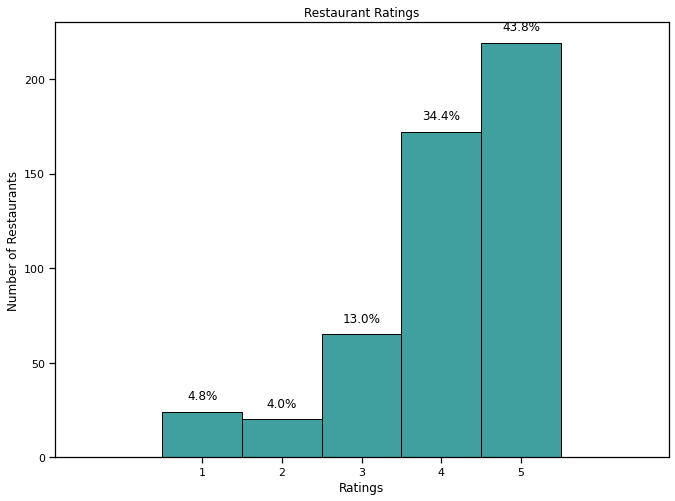

In [11]:
fig, ax = plt.subplots(figsize=(11,8))
sns.histplot(restaurant_df['Rating'], bins = np.arange(8) - 0.5, color='teal', ax=ax)
ax.set_xticks(range(1,6))
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Restaurant Ratings');

rating_count = restaurant_df['Rating'].value_counts().sort_index()
for i, val in enumerate(rating_count.values):
    ax.text(i+1, val+5, (f'{round((val/sum(rating_count.values))*100, 1)}%'), ha='center', va='bottom',size=12)  
    
    # Observations:
    # The book rating ranges from 0 to 10
    # Most books have a rating of 0
    # The ratings between 1-4 have very few books

##### _**2. users_df**_

In [12]:
user_revs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76395 entries, 0 to 76394
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_Name        76395 non-null  object 
 1   Account          76395 non-null  object 
 2   Location         76395 non-null  object 
 3   Date_of_review   76395 non-null  object 
 4   Rating           76395 non-null  float64
 5   Comment          76395 non-null  object 
 6   Restaurant_link  76395 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.1+ MB


In [13]:
# Checking how many unique users rated
len(user_revs_df['Account'].unique())

53724

In [14]:
user_revs_df.describe()

,Rating
count,76395.000000
mean,4.136959
std,1.124592
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
# List of locations to users majority
list_of_locs = set(user_revs_df['Location'])
dic_loc = {}

for location in list_of_locs:
    num = len(user_revs_df[user_revs_df['Location'] == location])
    dic_loc[location] = num
dic_loc

{'St Charles, MO': 1,
 'Arcadia, CA': 35,
 'Hadley, MA': 1,
 'Shelton, CT': 10,
 'Gravesend, NY': 6,
 'Oxford, MS': 1,
 'Holland, MI': 1,
 'Palm Beach, FL': 3,
 'San Antonio, TX': 91,
 'Guam, Guam': 1,
 'Saint Helena, CA': 4,
 'ROOSEVELT ISL, NY': 1,
 'Hyde Park, Austin, TX': 1,
 'Tomball, TX': 2,
 'Douglasville, GA': 5,
 'West Chester Township, OH': 2,
 'Woodridge, IL': 4,
 'Millbrook, NY': 1,
 'Jamaica Hills, Queens, NY': 2,
 'Oak Park, IL': 3,
 'Santa Barbara, CA': 33,
 'Lithia Springs, GA': 2,
 'Delano, CA': 1,
 'Pittsford, NY': 2,
 'Babylon, NY': 5,
 'Montreal, Canada': 33,
 'Charleston, SC': 23,
 'Morton, PA': 2,
 'Galivants Ferry, SC': 1,
 'Annandale, VA': 22,
 'Old Town, Tallahassee, FL': 1,
 'Edenwald, Bronx, NY': 2,
 'Orange City, FL': 1,
 'Old Bridge, Old Bridge Township, NJ': 2,
 'Bayside, NY': 52,
 'Hamburg, Germany': 5,
 'Orland Park, IL': 2,
 'Enfield, London, United Kingdom': 1,
 'Seminole, FL': 1,
 'Clearwater, FL': 14,
 'Zhonghe District, Taiwan': 1,
 'Tracy, CA': 6,


**Checking for the trend in book production over time**

In [16]:
dic_years = {}
for years in user_revs_df['Date_of_review']:
    if int(years[-4:]) in dic_years.keys():
        dic_years[int(years[-4:])] += 1
    else:
        dic_years[int(years[-4:])] = 1
dic_years

{2023: 3729,
 2022: 12099,
 2021: 7889,
 2020: 4872,
 2019: 9509,
 2018: 7827,
 2016: 5221,
 2017: 6326,
 2015: 4904,
 2014: 3659,
 2013: 2666,
 2011: 2127,
 2012: 2236,
 2010: 1439,
 2008: 570,
 2009: 901,
 2007: 277,
 2005: 20,
 2006: 124}

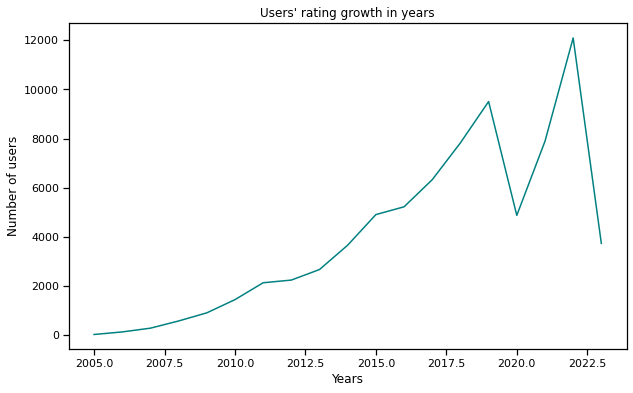

In [17]:
# years and books made
myKeys = list(dic_years.keys())
myKeys.sort()

X = myKeys
y = []
for i in myKeys:
    y.append(dic_years[i]) 

year_plot = pd.DataFrame()
year_plot['years'] = X
year_plot['numbers'] = y

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='years', y='numbers', data=year_plot, color='teal')

ax.set(xlabel='Years', ylabel='Number of users', 
       title='Users\' rating growth in years')
plt.show()
# Observations:
    # Most books in the dataset were published from 1950 to 202

* make sure we only get businesses that already show up in our review list and delete the rest.
* This step is necessary to ensure that the final dataset only contains restaurants that have been reviewed by users in the user_rev_df dataset. Removing restaurants that have not been reviewed by any users will help improve the accuracy of the recommender system by only recommending relevant items to users based on their past behavior. Additionally, it can help reduce computational complexity by reducing the number of items that need to be considered in the recommendation process.

In [18]:
filtered_restaurant_df = restaurant_df[restaurant_df['URL'].isin(user_revs_df['Restaurant_link'].unique())]
len(filtered_restaurant_df)

152

In [19]:
filtered_restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 497
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               152 non-null    object 
 1   Rating             152 non-null    int64  
 2   Pricing            110 non-null    object 
 3   URL                152 non-null    object 
 4   Latitude           152 non-null    float64
 5   Longitude          152 non-null    float64
 6   Transactions       152 non-null    object 
 7   Location           152 non-null    object 
 8   Phone              136 non-null    float64
 9   Display Phone      136 non-null    object 
 10  Distance           152 non-null    float64
 11  Reviews            152 non-null    object 
 12  Review Count       152 non-null    int64  
 13  Cuisine            152 non-null    object 
 14  Restaurant ID      152 non-null    object 
 15  Number of Reviews  152 non-null    int64  
dtypes: float64(4), int64(3), o

### Missing Values

* Pricing is an important feature that affects a customer's decision to dine in a restaurant. Since only a small percentage of the restaurants have missing pricing data (42 out of 152), we can afford to drop those rows without significantly impacting the size or representativeness of our dataset. Additionally, since we don't have any reliable way of imputing the missing values, dropping those rows is a reasonable choice.

In [20]:
filtered_restaurant_df.dropna(subset=['Pricing'], inplace=True)


In [21]:
# Replace missing values in Phone column with NaN
filtered_restaurant_df['Phone'] = filtered_restaurant_df['Phone'].replace({np.nan: 'NaN'})

# Drop Display Phone column
filtered_restaurant_df = filtered_restaurant_df.drop(columns=['Display Phone'])


* For the Phone column, replacing missing values with NaN allows us to retain the information for restaurants that do not have a phone number listed, while still being able to perform analysis on the available phone numbers for the other restaurants.
* The Display Phone column is redundant as it contains the same information as the Phone column. Dropping this column helps to simplify the dataframe and reduce unnecessary duplication of data.

In [22]:
filtered_restaurant_df

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",12123671979.0,3526.365252,[{'text': 'This small and crowded place seems ...,3,I t a l i a n,hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",12122545370.0,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,T h a i,jjJc_CrkB2HodEinB6cWww,6377
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",12122338888.0,1766.176007,[{'text': 'This is the third stop of our food ...,3,S h a n g h a i n e s e,0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",17187822585.0,1376.494330,[{'text': 'Excellent service & food! The drink...,3,C o c k t a i l B a r s,4DInnPhOyvXFbYpUdO0SMQ,325
5,Raku,4,$$,https://www.yelp.com/biz/raku-new-york-7?adjus...,40.726499,-73.986653,"['delivery', 'pickup']","342 E 6th St, New York, NY 10003",12122281324.0,2236.683282,"[{'text': 'Delicious food, there are heaters f...",3,J a p a n e s e,FlZ1zdVEKWv7dwqm8Uw8-w,1497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Little Mad,3,$$$$,https://www.yelp.com/biz/little-mad-new-york-2...,40.745020,-73.985130,[],"110 Madison Ave, New York, NY 10016",19172614969.0,4231.367528,[{'text': 'I went for my birthday. It took a w...,3,A m e r i c a n ( N e w ),SmLFW1Ncg26KfVRVX3GVFQ,166
490,Steak Frites Bistro,4,$$$,https://www.yelp.com/biz/steak-frites-bistro-n...,40.755591,-73.994449,[],"496 9th Ave, New York, NY 10018",19296145070.0,5530.277285,[{'text': 'Fantastic food and service. Great s...,3,S t e a k h o u s e s,V3dHB6xAdd8_dH7t481PAw,51
494,Bowery Road,3,$$$,https://www.yelp.com/biz/bowery-road-new-york-...,40.733343,-73.990192,"['delivery', 'pickup']","132 4th Ave, New York, NY 10003",12124321324.0,3052.241537,[{'text': 'Great spot in a fantastic location ...,3,A m e r i c a n ( N e w ),FJepPR5CYRggxRwAjlqg6A,252
495,ABC Kitchen,5,$$$,https://www.yelp.com/biz/abc-kitchen-new-york?...,40.737750,-73.989634,['delivery'],"35 E 18th St, New York, NY 10003",12124755829.0,3508.876621,[{'text': 'Came in shortly after 12:30pm for a...,3,B r e a k f a s t & B r u n c h,dMhRafXdr765DHe0k-QfaQ,3165


In [23]:
import pandas as pd

filtered_restaurant_df['Comments'] = ''

# loop through each row in the original dataframe
for index, row in filtered_restaurant_df.iterrows():
    # reviews = row['Reviews']
    url = row['URL']
    reviews = []
    holder = user_revs_df.loc[user_revs_df['Restaurant_link'] == url].iterrows()
    for row in holder:
        comment = row[1]['Comment']
        if comment != 'No comment':
            reviews.append([comment])
    
    filtered_restaurant_df['Comments'][filtered_restaurant_df['URL'] == url] = reviews
            

# Data Preparation

In [24]:
filtered_restaurant_df

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews,Comments
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",12123671979.0,3526.365252,[{'text': 'This small and crowded place seems ...,3,I t a l i a n,hdiuRS9sVZSMReZm4oV5SA,1851,This small and crowded place seems to be a nei...
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",12122545370.0,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,T h a i,jjJc_CrkB2HodEinB6cWww,6377,Absolutely LOVED LoveMama!! As a college stude...
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",12122338888.0,1766.176007,[{'text': 'This is the third stop of our food ...,3,S h a n g h a i n e s e,0CjK3esfpFcxIopebzjFxA,7098,"Casual, soup dumpling shop in Chinatown. No re..."
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",17187822585.0,1376.494330,[{'text': 'Excellent service & food! The drink...,3,C o c k t a i l B a r s,4DInnPhOyvXFbYpUdO0SMQ,325,Excellent service & food! The drinks were so b...
5,Raku,4,$$,https://www.yelp.com/biz/raku-new-york-7?adjus...,40.726499,-73.986653,"['delivery', 'pickup']","342 E 6th St, New York, NY 10003",12122281324.0,2236.683282,"[{'text': 'Delicious food, there are heaters f...",3,J a p a n e s e,FlZ1zdVEKWv7dwqm8Uw8-w,1497,"Delicious food, there are heaters for the outs..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Little Mad,3,$$$$,https://www.yelp.com/biz/little-mad-new-york-2...,40.745020,-73.985130,[],"110 Madison Ave, New York, NY 10016",19172614969.0,4231.367528,[{'text': 'I went for my birthday. It took a w...,3,A m e r i c a n ( N e w ),SmLFW1Ncg26KfVRVX3GVFQ,166,Really amazing experience here. We got the yel...
490,Steak Frites Bistro,4,$$$,https://www.yelp.com/biz/steak-frites-bistro-n...,40.755591,-73.994449,[],"496 9th Ave, New York, NY 10018",19296145070.0,5530.277285,[{'text': 'Fantastic food and service. Great s...,3,S t e a k h o u s e s,V3dHB6xAdd8_dH7t481PAw,51,Beautiful evening spent in this restaurant. I ...
494,Bowery Road,3,$$$,https://www.yelp.com/biz/bowery-road-new-york-...,40.733343,-73.990192,"['delivery', 'pickup']","132 4th Ave, New York, NY 10003",12124321324.0,3052.241537,[{'text': 'Great spot in a fantastic location ...,3,A m e r i c a n ( N e w ),FJepPR5CYRggxRwAjlqg6A,252,We came at a down time around midday for the r...
495,ABC Kitchen,5,$$$,https://www.yelp.com/biz/abc-kitchen-new-york?...,40.737750,-73.989634,['delivery'],"35 E 18th St, New York, NY 10003",12124755829.0,3508.876621,[{'text': 'Came in shortly after 12:30pm for a...,3,B r e a k f a s t & B r u n c h,dMhRafXdr765DHe0k-QfaQ,3165,"ABSOLUTELY PHENOMENAL!!! I got the special, wh..."


In [25]:
# Converting city, style, and reviews attributes to lowercase
filtered_restaurant_df['Location'] = filtered_restaurant_df['Location'].str.lower()
filtered_restaurant_df['Cuisine'] = filtered_restaurant_df['Cuisine'].str.lower()
filtered_restaurant_df['Comments'] = filtered_restaurant_df['Comments'].str.lower()

filtered_restaurant_df.sample(5)

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews,Comments
395,P.J. Clarke's,3,$$,https://www.yelp.com/biz/p-j-clarkes-new-york-...,40.713764,-74.016228,"['pickup', 'delivery']","250 vesey st, new york, ny 10281",12122851500.0,3226.748903,"[{'text': ""P.J. Clarke's on the Hudson is a ro...",3,a m e r i c a n ( t r a d i t i o n a l ),B-MDhRKRTmTqj4Vp_p8AGw,670,i have mixed feelings about p.j clarke's mainl...
151,Izakaya Juraku,3,$$$,https://www.yelp.com/biz/izakaya-juraku-new-yo...,40.719680,-73.988709,"['delivery', 'pickup']","121 ludlow st, new york, ny 10002",12124770100.0,1608.999794,[{'text': 'Came to this place after work with ...,3,b a r s,RYKGs45OjF-vlb2Ds2Jb_g,191,food was good! especially the karage fries and...
384,Karasu,4,$$$,https://www.yelp.com/biz/karasu-brooklyn-2?adj...,40.689373,-73.973246,[],"166 dekalb ave, walter's, brooklyn, ny 11217",NaN,2045.301401,"[{'text': ""Karasu is good. It's located within...",3,j a p a n e s e,eyjeP9CJZ_gYgeJFP_vtpQ,111,karasu is a japanese speakeasy hidden behind a...
394,Tuk Tuk,4,$$,https://www.yelp.com/biz/tuk-tuk-long-island-c...,40.743232,-73.954254,"['pickup', 'delivery']","4906 vernon blvd, long island city, ny 11101",17184725598.0,4508.884632,[{'text': 'The walls were decorated with some ...,3,t h a i,f7jZvRH-h76F4emzvKytaQ,762,"food was good, especially the yum nam khao tod..."
91,Soba-ya,5,$$,https://www.yelp.com/biz/soba-ya-new-york?adju...,40.729650,-73.987890,"['pickup', 'delivery']","229 e 9th st, new york, ny 10003",12125336966.0,2602.136813,[{'text': 'Place was empty and we were seated ...,3,j a p a n e s e,i8ejDDR4COtukAAA1Ls5fw,1544,"the chicken katsu don was really yummy, but th..."


In [27]:
# Dropping the reviews column
filtered_restaurant_df = filtered_restaurant_df.drop(['Reviews'],axis=1)
filtered_restaurant_df.head()

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Distance,Review Count,Cuisine,Restaurant ID,Number of Reviews,Comments
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 w 13th st, new york, ny 10011",12123671979.0,3526.365252,3,i t a l i a n,hdiuRS9sVZSMReZm4oV5SA,1851,this small and crowded place seems to be a nei...
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd ave, new york, ny 10003",12122545370.0,2645.074283,3,t h a i,jjJc_CrkB2HodEinB6cWww,6377,absolutely loved lovemama!! as a college stude...
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 bowery st, new york, ny 10013",12122338888.0,1766.176007,3,s h a n g h a i n e s e,0CjK3esfpFcxIopebzjFxA,7098,"casual, soup dumpling shop in chinatown. no re..."
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 s 2nd st, brooklyn, ny 11249",17187822585.0,1376.494330,3,c o c k t a i l b a r s,4DInnPhOyvXFbYpUdO0SMQ,325,excellent service & food! the drinks were so b...
5,Raku,4,$$,https://www.yelp.com/biz/raku-new-york-7?adjus...,40.726499,-73.986653,"['delivery', 'pickup']","342 e 6th st, new york, ny 10003",12122281324.0,2236.683282,3,j a p a n e s e,FlZ1zdVEKWv7dwqm8Uw8-w,1497,"delicious food, there are heaters for the outs..."


# Modeling

# Evaluation

# Deployment